In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.What is Supervised Learning?

Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process. Supervised learning helps organizations solve for a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox.



### 2.Write Application of Classification Algorithms?

- Image Recognition: Classification is used in computer vision tasks to classify images into predefined classes, enabling applications like object detection, facial recognition, and autonomous driving.

- Object Detection in Autonomous Vehicles: Classification is used to detect and classify objects in real-time for autonomous vehicles, enabling them to identify and respond to pedestrians, traffic signs, and other vehicles.

- Face Recognition: Classification algorithms are used to identify and authenticate individuals based on facial features, finding applications in security systems, access control, and surveillance.

- Disease Diagnosis: Classification algorithms analyze patient data, symptoms, and medical test results to classify diseases or predict the likelihood of certain conditions, assisting in medical diagnosis.

- Land Cover Classification in Remote Sensing: Classification algorithms are used to classify land cover types (e.g., forests, urban areas, water bodies) in satellite or aerial imagery, aiding in environmental monitoring, urban planning, and natural resource management.

- Voice Recognition: Classification is used in speech recognition systems to classify spoken words or phrases, enabling applications like voice assistants, transcription services, and speaker identification.

- Language Identification: Classification models can classify text data into different languages, aiding in language identification tasks, multilingual analysis, and machine translation.

- Sentiment Analysis: Classification techniques are applied to analyze and classify text data (e.g., customer reviews, social media posts) to determine sentiment (positive, negative, neutral) and understand public opinion and brand perception.

- Email Spam Filtering: Classification algorithms are used to classify emails as either spam or non-spam, helping in filtering unwanted or malicious emails.

- Toxic Comment Classification: Classification techniques are employed to classify text comments as toxic or non-toxic, helping to identify and moderate harmful or abusive content on online platforms.

 ### 3.How is KNN different from k-means clustering?

The k parameter is utilized by both the machine learning methods kNN and k−means clustering, however they are applied to distinct problems and function in different ways.

The key distinction between kNN and k−means clustering is that whereas kNN is a supervised learning technique used for classification and regression problems, k−means clustering is an unsupervised learning approach.

kNN works by finding the k nearest data points in the training dataset to a new input, and then using their labels (in the case of classification) or values (in the case of regression) to predict the output for the new input. On the other hand, k−means clustering aims to group similar data points into k clusters based on their feature similarities, without the use of labels.

Another difference is that kNN calculates the distance between the new input and all the data points in the training set to find the k nearest neighbors, while k−means clustering iteratively updates the cluster centers based on the mean of the data points assigned to each cluster.

When it comes to applications, k−means clustering may be used for unsupervised clustering tasks like customer segmentation or picture compression, whereas k−NN can be utilized for straightforward classification and regression tasks.

Generally, there are differences between kNN and k−means clustering that are employed for various tasks. Even though they both use the k parameter, they work differently and are employed for various purposes.

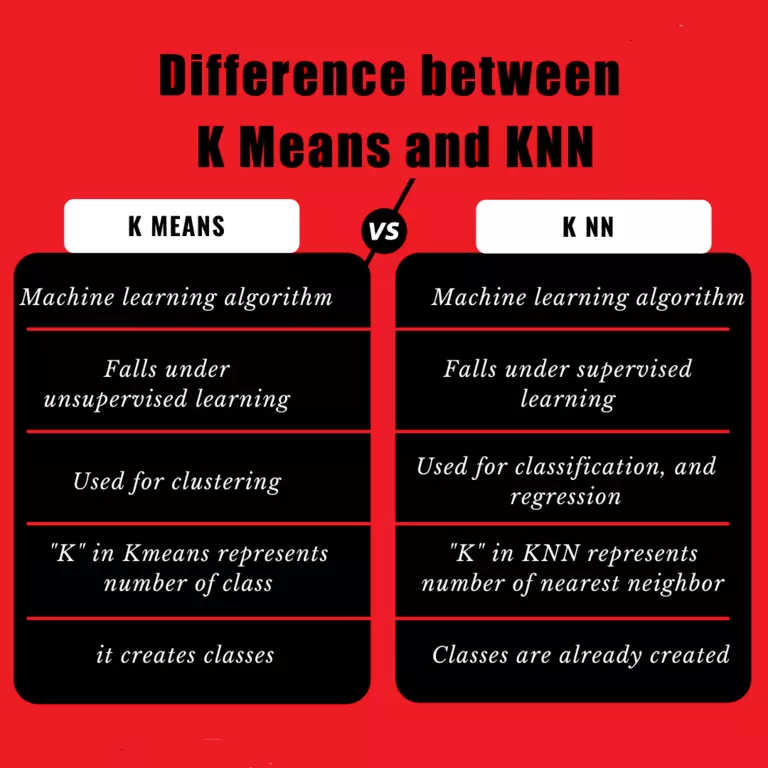

### 4.Load the Customer_Churn dataset.

In [4]:
df=pd.read_csv("customer_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### a. Build the kmeans algorithm on top of ‘customer_features’. For the model, the number of clusters should be 3.


In [6]:
df_temp=df.drop("customerID",axis=1)

In [7]:
df_temp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### b. Calculate the clustering vector values for the monthly charges column form the customer_features.


In [9]:
object_columns=[fea for fea in df_temp.columns if df_temp[fea].dtype=="object"]

In [10]:
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
for column in object_columns:
    df_temp[column]=le.fit_transform(df_temp[column])

In [13]:
df_temp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [19]:
train_dt_temp=df_temp.drop("Churn",axis=1);

In [20]:
 from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=3, random_state=0, n_init="auto")
yp = km.fit_predict(train_dt_temp)
yp

array([0, 2, 2, ..., 0, 0, 1])

#### c. Bind the monthly charges column to the clustering vector and store that data in month_group.

In [32]:
from sklearn.cluster import KMeans
ms = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=42)
ms.fit_predict(train_dt_temp['MonthlyCharges'].values.reshape(-1,1))

In [35]:
month_group

array([2, 0, 0, ..., 2, 0, 1])

#### d.Convert the month_group matrix into a data frame.


In [36]:
mg=pd.DataFrame()

In [37]:
mg["month_group"]=month_group

In [38]:
mg

,month_group
0,2
1,0
2,0
3,2
4,0
...,...
7038,1
7039,1
7040,2
7041,0


#### e. Separate all the 3 clusters with their values.


In [43]:
cluster1=km.cluster_centers_[0]
cluster2=km.cluster_centers_[1]
cluster3=km.cluster_centers_[2]

In [45]:
print(f"Cluster1 \n {cluster1}")
print(f"Cluster2 \n {cluster2}")
print(f"Cluster3 \n {cluster3}")

Cluster1 
 [5.09114583e-01 1.73177083e-01 4.82204861e-01 2.99479167e-01
 3.37630208e+01 8.87152778e-01 9.44444444e-01 6.94010417e-01
 7.88628472e-01 9.28385417e-01 9.20572917e-01 8.13802083e-01
 9.62239583e-01 9.80468750e-01 6.53211806e-01 6.16319444e-01
 1.53732639e+00 6.78184896e+01 3.32732031e+03]
Cluster2 
 [4.96491228e-01 1.77192982e-01 5.32894737e-01 2.97807018e-01
 3.78548246e+01 9.46491228e-01 1.09035088e+00 9.16228070e-01
 8.46929825e-01 1.01359649e+00 1.02850877e+00 8.60087719e-01
 1.16447368e+00 1.17675439e+00 8.51315789e-01 6.38157895e-01
 1.48596491e+00 7.43357895e+01 5.47841798e+03]
Cluster3 
 [5.08336722e-01 1.37860919e-01 4.37576251e-01 3.01342009e-01
 2.59825132e+01 8.77999187e-01 7.97885319e-01 1.00040667e+00
 7.38511590e-01 7.86498577e-01 7.74298495e-01 7.23058154e-01
 8.40992273e-01 8.32858886e-01 5.76250508e-01 5.27043514e-01
 1.69093127e+00 5.30204148e+01 1.13367426e+03]


### 5. Write about Naive Bayes and Write a short Program to demonstrate it


Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. To start with, let us consider a dataset.

One of the most simple and effective classification algorithms, the Naïve Bayes classifier aids in the rapid development of machine learning models with rapid prediction capabilities.

In [4]:
   
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
   
X = iris.data
y = iris.target
   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
   
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
   

y_pred = gnb.predict(X_test)
   
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0
